# Pymaceuticals Drug Trial Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
mouse_file = "Resources/mouse_drug_data.csv"
trial_file = "Resources/clinicaltrial_data.csv"

In [3]:
mouse_df = pd.read_csv(mouse_file)
trial_df = pd.read_csv(trial_file)

In [4]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [24]:
full_df = pd.merge(mouse_df, trial_df, on="Mouse ID")
full_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [7]:
full_df.groupby("Drug")["Timepoint"].count()
tumor_response = full_df.groupby(["Drug", "Timepoint"])
tumor_df = tumor_response["Tumor Volume (mm3)"].mean().to_frame()
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [8]:
tumor_plot_pre = tumor_df.unstack(0)
tumor_plot_df = tumor_plot_pre["Tumor Volume (mm3)"]
tumor_plot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
tumor_plot_df["Ceftamin"]

Timepoint
0     45.000000
5     46.503051
10    48.285125
15    50.094055
20    52.157049
25    54.287674
30    56.769517
35    58.827548
40    61.467895
45    64.132421
Name: Ceftamin, dtype: float64

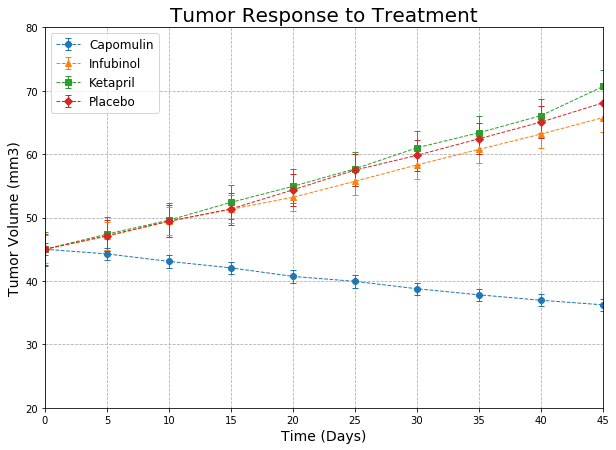

In [10]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

error = tumor_plot_df["Capomulin"].sem()
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_plot_df["Infubinol"].sem()
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_plot_df["Ketapril"].sem()
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_plot_df["Placebo"].sem()
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

## Metastatic Response to Treatment

In [11]:
full_df.groupby("Drug")["Timepoint"].count()
meta_response = full_df.groupby(["Drug", "Timepoint"])
meta_df = meta_response["Metastatic Sites"].mean().to_frame()
meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
meta_plot_pre = meta_df.unstack(0)
meta_plot_df = meta_plot_pre["Metastatic Sites"]
meta_plot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


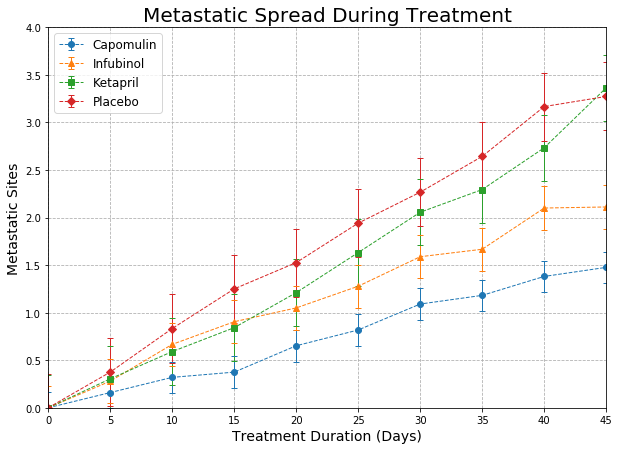

In [13]:
plt.figure(figsize=(10,7))

error2 = meta_plot_df["Capomulin"].sem()
cap2 = plt.errorbar(x_axis, meta_plot_df["Capomulin"], yerr=error2, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_plot_df["Infubinol"].sem()
infu2 = plt.errorbar(x_axis, meta_plot_df["Infubinol"], yerr=error2, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_plot_df["Ketapril"].sem()
keta2 = plt.errorbar(x_axis, meta_plot_df["Ketapril"], yerr=error2, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = meta_plot_df["Placebo"].sem()
plac2 = plt.errorbar(x_axis, meta_plot_df["Placebo"], yerr=error2, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(0, 4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap2, infu2, keta2, plac2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

## Survival Rates

In [14]:
pre_mice = full_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mice = pre_mice.to_frame()
mice = mice.rename(columns={"Mouse ID": "Mouse Count"})
mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]
mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


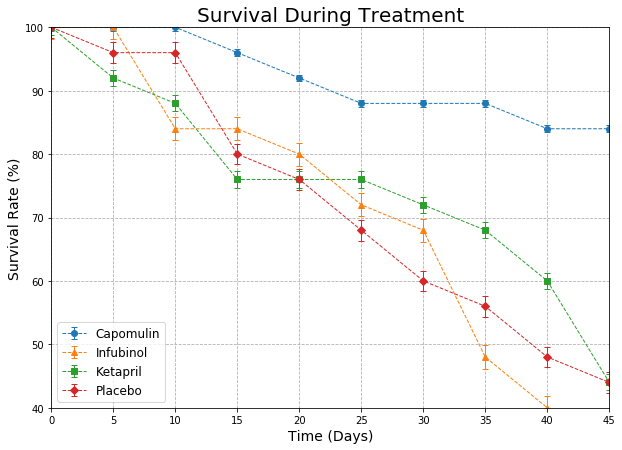

In [16]:
plt.figure(figsize=(10,7))

error3 = mice_df["Capomulin"].sem()
cap3 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), yerr=error3, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error3 = mice_df["Infubinol"].sem()
infu3 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), yerr=error3, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error3 = mice_df["Ketapril"].sem()
keta3 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100), yerr=error3, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error3 = mice_df["Placebo"].sem()
plac3 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100), yerr=error3, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(40, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

## Summary Bar Graph

In [17]:
capchange = ((tumor_plot_df["Capomulin"][45] - tumor_plot_df["Capomulin"][0])/45)*100
ceftchange = ((tumor_plot_df["Ceftamin"][45] - tumor_plot_df["Ceftamin"][0])/45)*100
infuchange = ((tumor_plot_df["Infubinol"][45] - tumor_plot_df["Infubinol"][0])/45)*100
ketachange = ((tumor_plot_df["Ketapril"][45] - tumor_plot_df["Ketapril"][0])/45)*100
naftchange = ((tumor_plot_df["Naftisol"][45] - tumor_plot_df["Naftisol"][0])/45)*100
placchange = ((tumor_plot_df["Placebo"][45] - tumor_plot_df["Placebo"][0])/45)*100
propchange = ((tumor_plot_df["Propriva"][45] - tumor_plot_df["Propriva"][0])/45)*100
ramichange = ((tumor_plot_df["Ramicane"][45] - tumor_plot_df["Ramicane"][0])/45)*100
stelchange = ((tumor_plot_df["Stelasyn"][45] - tumor_plot_df["Stelasyn"][0])/45)*100
zonichange = ((tumor_plot_df["Zoniferol"][45] - tumor_plot_df["Zoniferol"][0])/45)*100


In [18]:
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [capchange, infuchange, ketachange, placchange]
                              })
drug_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [19]:
plt.figure(figsize=(8,5))
x_axis2 = np.arange(len(drug_change_df["Drug"]))

rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis2]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])
plt.xlim(0, 4)
plt.ylim(-30, 70)


(-30, 70)

In [20]:
plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")

In [21]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

In [22]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

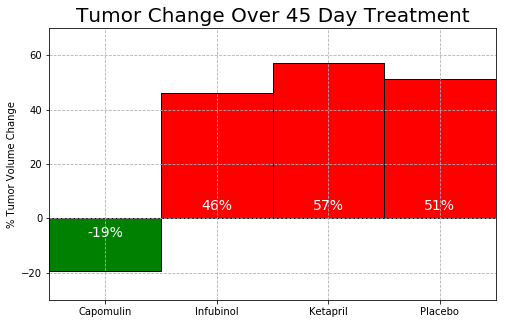

In [23]:
plt.show()